# Advent of Code 2023, Day 8
[Day 8 Challenge](https://adventofcode.com/2023/day/8)

In [222]:
import aoc
import logging
import networkx as nx
import matplotlib.pyplot as plt
import math
%reload_ext autoreload

day = 8
sample = False

In [223]:
input_list = aoc.split_contents(aoc.read_input(f'Input/day_{day:02}{"_sample" if sample else ""}.txt'))

# Part 1

In [224]:
instructions = input_list[0]

In [225]:
nodes = dict()
for item in input_list[2:]:
    node_key = item.split('=')[0].strip()
    node_value = item.split('=')[1].replace('(','').replace(')','').replace(' ','').split(',')
    nodes[node_key] = node_value

In [226]:
current_node = 'AAA'
step_count = 0
while True:
    for direction in instructions:
        current_node = nodes[current_node][0] if direction == 'L' else nodes[current_node][1]
        step_count += 1
        if current_node == 'ZZZ':
            break
    if current_node == 'ZZZ':
        break

In [227]:
step_count

20093

# Part 2

In [228]:
input_list_2 = aoc.split_contents(aoc.read_input(f'Input/day_{day:02}{"_sample_part2" if sample else ""}.txt'))

In [229]:
instructions = input_list_2[0]

In [230]:
nodes = dict()
starting_nodes = list()
for item in input_list_2[2:]:
    node_key = item.split('=')[0].strip()
    node_value = item.split('=')[1].replace('(','').replace(')','').replace(' ','').split(',')
    nodes[node_key] = node_value
    if node_key[-1] == 'A':
        starting_nodes.append(node_key)

In [231]:
aoc.logger.setLevel(logging.DEBUG)
start_nodes = [x for x in nodes.keys() if x[-1]=='A']
end_nodes = [x for x in nodes.keys() if x[-1]=='Z']

In [232]:
G = nx.MultiDiGraph()
G.add_nodes_from(list(nodes))
for key, item in nodes.items():
    G.add_edge(key, item[0], key='L')
    G.add_edge(key, item[1], key='R')

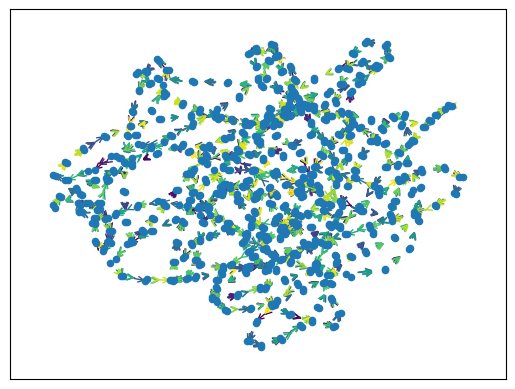

In [233]:
M = G.number_of_edges()
edge_colors = range(2, M + 2)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodes, node_size=20)
nx.draw_networkx_edges(G, pos, arrowstyle='->', width=1, edgelist=G.edges(), edge_color=edge_colors)
plt.show()

In [234]:
all_paths = list()
for s_node in start_nodes:
    for e_node in end_nodes:
        if nx.has_path(G, s_node, e_node):
            all_paths.append([s_node, e_node])

In [235]:
all_paths

[['VGA', 'PQZ'],
 ['AAA', 'ZZZ'],
 ['LHA', 'BKZ'],
 ['RHA', 'XNZ'],
 ['CVA', 'KJZ'],
 ['LDA', 'XLZ']]

In [236]:
aoc.logger.setLevel(logging.WARNING)
step_list = list()
for start_end in all_paths:
    step_counter = 0
    current_node = start_end[0]
    while True:
        instruction_pointer = step_counter % len(instructions)
        instruction = instructions[instruction_pointer]
        current_node = nodes[current_node][0] if instruction == 'L' else nodes[current_node][1]
        step_counter += 1
        if current_node == start_end[1]:
            print(f'{start_end} solution found in {step_counter} steps')
            step_list.append(step_counter)
            break

['VGA', 'PQZ'] solution found in 20659 steps
['AAA', 'ZZZ'] solution found in 20093 steps
['LHA', 'BKZ'] solution found in 14999 steps
['RHA', 'XNZ'] solution found in 17263 steps
['CVA', 'KJZ'] solution found in 22357 steps
['LDA', 'XLZ'] solution found in 16697 steps


To find the solution, we need the least common multiple of all the steps.

In [237]:
math.lcm(*step_list)

22103062509257